# 3b. NLTK Basics

## Lernziele

1. Laden von NLTK-Paketen
2. Tokenisierung 
3. Das Text-Objekt
4. Einlesen von Texten 

## 1. Laden von NLTK-Paketen

Nach einmaligem installieren von NLTK (hier im Jupyter Lab bereits geschehen), müssen die benötigen **Pakete geladen** werden. 
NLTK umfasst viele Pakete. Man lädt immer nur diejenigen, die aktuell benötigt werden, um Zeit zu sparen.

Lade das Paket `punkt`, indem du die unten stehende Codezelle ausführst.

<div class="alert alert-block alert-info"> <b>Hinweis</b>: In den folgenden Abschnitten der Notebooks wird davon ausgegangen, dass <b> jede Codezelle</b> ausgeführt wird. Die grauen eckigen Klammern links neben der Codezelle gibt an, ob der Code noch nicht ausgeführt wurde [ ], gerade ausgeführt wird [*] oder schon ausgeführt wurde [1]. Bei ausgeführten Zellen gibt die Nummer an, in welcher Reihenfolge die Zellen ausgeführt wurden (höchste Zahl = zuletzt ausgeführt). 
</div>

In [1]:
import nltk

nltk.download("punkt", quiet=True)

True

Im Folgenden wollen wir mit einem sehr kurzen Text arbeiten, um einige Funktionen von NLTK praktisch kennenzulernen. Dafür überführen wir den Satz in einen **String** und weisen ihn der Variable text_string zu.

In [2]:
# first sentence of "Rumpelstilzchen", see: https://de.wikisource.org/wiki/Rumpelstilzchen_(1857)
text_string = "Es war einmal ein Müller, der war arm, aber er hatte eine schöne Tochter."
type(text_string)

str

## 2. Tokenisierung mit NLTK

Tokenisierung, also die Zerlegung von Texten in Bestandteile (Wörter, Sätze, Abschnitte) ist eine grundlegende Vorverarbeitung, die für viele weiteren Analysen notwendig ist.

Die Funktion `word_tokenize()`  
+ erhält einen Text (String) als Input, sowie optional die Sprache (Standardwert ist Englisch)
+ gibt eine tokenisierte Version des Input-Texts als Output zurück

<div class="alert alert-block alert-info"> <b>Hinweis</b>: Funktionen, die zu bestimmten Bibliotheken gehören, werden üblicherweise in der Form <code>name_bibliothek.name_funktion()</code> aufgerufen z. B. <code>nltk.word_tokenize()</code>  
</div>
    
Für Details zur Funktion `word_tokenize()` kann die Hilfe aufgerufen werden.

In [3]:
?nltk.word_tokenize

<div class="alert alert-warning">
    <b>Übung</b>: Ändere den Wert des language-Arguments zu "german".
</div>

In [4]:
nltk.word_tokenize(text_string, language="english")

['Es',
 'war',
 'einmal',
 'ein',
 'Müller',
 ',',
 'der',
 'war',
 'arm',
 ',',
 'aber',
 'er',
 'hatte',
 'eine',
 'schöne',
 'Tochter',
 '.']

Wie oben beschrieben, gibt `word_tokenize` die tokenisierte Form des Inputs zurück. Der Output ist jedoch kein String mehr, sondern eine **Liste**

**Liste**
+ ist ein Data Type (wie String, Integer, Float)
+ beginnt mit einer eckigen Klammer und endet mit einer eckigen Klammer
+ die einzelnen **Elemente** sind durch ein Komma getrennt
+ eine Liste kann Elemente unterschiedlicher Data Types beinhalten

In [5]:
tokens = nltk.word_tokenize(text_string, language="german")
type(tokens)

list

## 3. Das Text-Objekt bei NLTK

Für einen ersten Überblick über einige Eigenschaften des Texts kann ein nltk.Text-Objekt erstellt werden.

Mithilfe eines nltk.Text-Objekts lässt sich beispielsweise:
+ die Häufigkeit von Tokens im Text anzeigen -> .vocab()
+ die Häufigkeit von Tokens im Text visualisieren -> .plot()

Dafür muss zunächst das nltk.Text-Objekt erstellt werden.

In [6]:
text = nltk.Text(tokens)
text

<Text: Es war einmal ein Müller , der war...>

In [7]:
text.vocab()

FreqDist({'war': 2, ',': 2, 'Es': 1, 'einmal': 1, 'ein': 1, 'Müller': 1, 'der': 1, 'arm': 1, 'aber': 1, 'er': 1, ...})

<div class="alert alert-warning">
    <b>Übung</b>: Verändere die beiden Codezeilen unten, sodass (a) nur die drei häufigsten Tokens ausgegeben werden und (b) nur die fünf häufigsten Tokens visualisiert werden.
</div>

In [8]:
vocab = text.vocab()
vocab.most_common(10)

[('war', 2),
 (',', 2),
 ('Es', 1),
 ('einmal', 1),
 ('ein', 1),
 ('Müller', 1),
 ('der', 1),
 ('arm', 1),
 ('aber', 1),
 ('er', 1)]

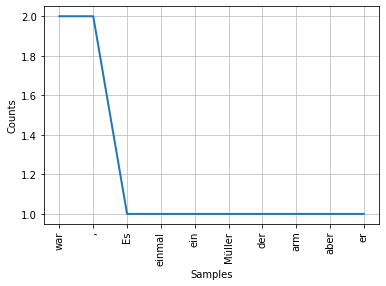

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
text.plot(10)

Die Abbildung oben zeigt, dass war und Komma zweimal vorkommen, alle anderen Tokens nur einmal. 

Bei sehr kurzen Texten (ein Satz) ist eine solche Häufigkeitsverteilung wenig aussagekräftig. Wir benötigen also einen längeren Text! 

## Exkurs: Einlesen einer Textdatei

Zum Einlesen einer Datei führen wir die folgenden Codezellen aus:

In [10]:
import pathlib

DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
filename = (
    DATA_DIR.joinpath("corpus").joinpath("grimm").joinpath("grimm_rumpelstilzchen_281-284.txt")
)
filename

PosixPath('/home/afuetterer/workspace/Textarbeit-mit-Python/data/corpus/grimm/grimm_rumpelstilzchen_281-284.txt')

In [11]:
with open(filename, "r", encoding="utf-8") as infile:
    text_string = infile.read()

Wir lassen uns die ersten 250 Zeichen des Textes ausgeben, um zu überprüfen, ob der richtige Text eingelesen wurde.

In [12]:
text_string[:250]

'55.\nRumpelstilzchen.\n\nEs war einmal ein Müller, der war arm, aber er hatte eine schöne Tochter. Nun traf es sich, daß er mit dem König zu sprechen kam, und um sich ein Ansehen zu geben, sagte er zu ihm „ich habe eine Tochter, die kann Stroh zu Gold s'

Nun überschreiben wir die Variable `tokens`, indem wir den neuen Inhalt von `text_string` übergeben.

In [13]:
tokens = nltk.word_tokenize(text_string, language="german")
text = nltk.Text(tokens)

In welchem Kontext kömmt das Wort "König" vor?

Mit `.concordance("König")` wird der Suchbegriff "König" im Text gesucht. Die Ausgabe ist eine Darstellung des Suchbegriffs im Kontext.

In [14]:
text.concordance("König")

Displaying 5 of 5 matches:
 . Nun traf es sich , daß er mit dem König zu sprechen kam , und um sich ein An
ie kann Stroh zu Gold spinnen. “ Der König sprach zum Müller „ das ist eine Kun
ld . Bei Sonnenaufgang kam schon der König und als er das Gold erblickte , erst
h zu glänzendem Gold gesponnen . Der König freute sich über die Maßen bei dem A
troh zu Gold . Und als am Morgen der König kam und alles fand wie er gewünscht 


In [15]:
vocab = text.vocab()
vocab.most_common(10)

[(',', 96),
 ('und', 45),
 ('„', 33),
 ('“', 32),
 ('das', 32),
 ('die', 28),
 ('zu', 20),
 ('ich', 19),
 ('.', 17),
 ('du', 16)]

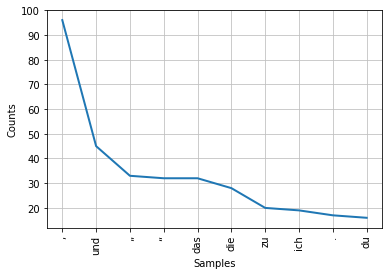

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
text.plot(10)

<div class="alert alert-block alert-info">
    <b>Hinweis</b>: Die häufigsten Tokens sind üblicherweise Satzzeichen und sog. <b>Stoppwörter</b>. Im folgenden Abschnitt schauen wir uns an, wie diese entfernt und damit aussagekräftigere Ergebnisse erzielt werden können. 
</div>

## Zusammenfassung

1. Laden von NLTK-Paketen
2. Tokenisierung 

3. Das Text-Objekt
    + .vocab()
    + .plot()
    + .concordance()
4. Einlesen von Texten 
5. Weitere Grundbegriffe
    + Liste
    + Element
    + Stoppwort


## **Optionale** Übung

Bisher kennen wir drei Methoden von nltk.Text-Objekten (.vocab(), .plot(), .concordance()).

Die Funktion `dir()` zeigt, welche anderen Methoden für nltk.Text-Objekte noch zur Verfügung stehen.

In [17]:
dir(nltk.Text)

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_context',
 '_train_default_ngram_lm',
 'collocation_list',
 'collocations',
 'common_contexts',
 'concordance',
 'concordance_list',
 'count',
 'dispersion_plot',
 'findall',
 'generate',
 'index',
 'plot',
 'readability',
 'similar',
 'vocab']

Ersetze `text_string` durch einen beliebigen String (optimalerweise mehrere Sätze) und probiere verschiedene Methoden des nltk.Text-Objekts aus. Verwende die Hilfefunktion, um mehr über die jeweilige Methode zu erfahren.

In [18]:
text_string = "insert string here"

In [19]:
tokens = nltk.word_tokenize(text_string, language="german")
text = nltk.Text(tokens)